<span style="color: yellow; font-size: 24px;">Combine all datasets</span>

In [203]:
import pandas as pd
import os

# Specify the folder containing your CSV files
folder_path = "./stocks data"

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each CSV file and append it to the list
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)  # Read each CSV file into a DataFrame
    dataframes.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv("combined data.csv", index=False)

print("All files combined into 'combined_data.csv'")


All files combined into 'combined_data.csv'


<span style="color: yellow; font-size: 24px;">Extract Equity data</span>

In [204]:
allData = pd.read_csv('combined data.csv')
equityData = allData[allData['CODE']=='EQTY']
equityData.head(10)

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
13,1/2/2007,EQTY,Equity Bank,19.5,36.5,140,145,141,138,3,2.13%,"7,500",4.7
58,1/3/2007,EQTY,Equity Bank,19.55,36.5,140,150,144,141,3,2.08%,"13,300",4.8
103,1/4/2007,EQTY,Equity Bank,19.5,36.5,146,157,154,144,10,6.49%,"28,800",5.13
147,1/5/2007,EQTY,Equity Bank,19.55,36.5,155,170,167,154,13,7.78%,"53,100",5.57
190,1/8/2007,EQTY,Equity Bank,19.55,36.5,170,185,179,167,12,6.70%,"93,000",5.97
234,1/9/2007,EQTY,Equity Bank,19.55,36.5,185,202,199,179,20,10.05%,"97,600",6.63
278,1/10/2007,EQTY,Equity Bank,19.55,36.5,210,222,221,199,22,9.95%,"218,300",7.37
324,1/11/2007,EQTY,Equity Bank,19.55,36.5,219,244,237,221,16,6.75%,"281,200",7.9
370,1/12/2007,EQTY,Equity Bank,19.55,36.5,203,220,213,237,-24,11.27%,"44,900",7.1
415,1/15/2007,EQTY,Equity Bank,19.55,36.5,190,202,198,213,-15,7.58%,"108,900",6.6


<span style="color: yellow; font-size: 24px;">Data Cleaning</span>

In [205]:
import numpy as np

# Replace "-" with NaN (null) values and assign back to equityData
equityData = equityData.replace("-", np.nan)

# check for NaN values
na_counts = equityData.isna().sum()

print(na_counts)


DATE           0
CODE           0
NAME           0
12m Low        0
12m High       0
Day Low        0
Day High       0
Day Price      0
Previous       0
Change       342
Change%      342
Volume         0
Adjust       945
dtype: int64


In [206]:
len(equityData)

1500

In [207]:
# Drop specified columns

columns_to_drop = ['CODE','NAME','Adjust']

equityData.drop(columns=columns_to_drop, axis=1, inplace=True)

equityData.head()

,DATE,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume
13,1/2/2007,19.5,36.5,140,145,141,138,3,2.13%,"7,500"
58,1/3/2007,19.55,36.5,140,150,144,141,3,2.08%,"13,300"
103,1/4/2007,19.5,36.5,146,157,154,144,10,6.49%,"28,800"
147,1/5/2007,19.55,36.5,155,170,167,154,13,7.78%,"53,100"
190,1/8/2007,19.55,36.5,170,185,179,167,12,6.70%,"93,000"


In [208]:
# Remove '%' sign  from change% and convert to float

equityData['Change%'] = equityData['Change%'].replace('%', '', regex=True).astype(float)
equityData.head()


,DATE,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume
13,1/2/2007,19.5,36.5,140,145,141,138,3,2.13,"7,500"
58,1/3/2007,19.55,36.5,140,150,144,141,3,2.08,"13,300"
103,1/4/2007,19.5,36.5,146,157,154,144,10,6.49,"28,800"
147,1/5/2007,19.55,36.5,155,170,167,154,13,7.78,"53,100"
190,1/8/2007,19.55,36.5,170,185,179,167,12,6.70,"93,000"


In [209]:
# Impute missing Change and Change% using the forward fill method

equityData['Change'].fillna(method='ffill', inplace=True)
equityData['Change%'].fillna(method='ffill', inplace=True)

equityData.to_csv('equity stocks.csv')


print(equityData.isna().sum())



DATE         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
dtype: int64


C:\Users\night\AppData\Local\Temp\ipykernel_15572\3417371835.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  equityData['Change'].fillna(method='ffill', inplace=True)
C:\Users\night\AppData\Local\Temp\ipykernel_15572\3417371835.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  equityData['Change'].fillna(method='ffill', inplace=True)
C:\Users\night\AppData\Local\Temp\ipykernel_15572\3417371835.py:4: FutureWarning: A value is trying t

In [210]:
# Convert 'DATE' column to datetime type
equityData["DATE"] = pd.to_datetime(equityData['DATE'], format='%m/%d/%Y', errors='coerce')


# Extract Year, Month, and Day from the 'DATE' column into separate columns

equityData['year'] = equityData['DATE'].dt.year  # Extract the year
equityData['month'] = equityData['DATE'].dt.month  # Extract the month
equityData['day'] = equityData['DATE'].dt.day  # Extract the day

# Drop the original 'DATE' column as it's no longer needed
equityData = equityData.drop("DATE", axis=1)


equityData[0:20]


,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,year,month,day
13,19.5,36.5,140,145,141,138,3,2.13,"7,500",2007,1,2
58,19.55,36.5,140,150,144,141,3,2.08,"13,300",2007,1,3
103,19.5,36.5,146,157,154,144,10,6.49,"28,800",2007,1,4
147,19.55,36.5,155,170,167,154,13,7.78,"53,100",2007,1,5
190,19.55,36.5,170,185,179,167,12,6.70,"93,000",2007,1,8
234,19.55,36.5,185,202,199,179,20,10.05,"97,600",2007,1,9
278,19.55,36.5,210,222,221,199,22,9.95,"218,300",2007,1,10
324,19.55,36.5,219,244,237,221,16,6.75,"281,200",2007,1,11
370,19.55,36.5,203,220,213,237,-24,11.27,"44,900",2007,1,12
415,19.55,36.5,190,202,198,213,-15,7.58,"108,900",2007,1,15


In [211]:
# Remove commas in volume and convert to numeric

equityData['Volume'] = equityData['Volume'].str.replace(',', '').astype(float)

equityData.head()

,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,year,month,day
13,19.5,36.5,140,145,141,138,3,2.13,7500.0,2007,1,2
58,19.55,36.5,140,150,144,141,3,2.08,13300.0,2007,1,3
103,19.5,36.5,146,157,154,144,10,6.49,28800.0,2007,1,4
147,19.55,36.5,155,170,167,154,13,7.78,53100.0,2007,1,5
190,19.55,36.5,170,185,179,167,12,6.70,93000.0,2007,1,8


In [212]:
equityData.dtypes

12m Low       object
12m High      object
Day Low       object
Day High      object
Day Price     object
Previous      object
Change        object
Change%      float64
Volume       float64
year           int32
month          int32
day            int32
dtype: object

In [219]:
# Convert relevant columns to numeric

equityData['12m Low'] = pd.to_numeric(equityData['12m Low'], errors='coerce')
equityData['12m High'] = pd.to_numeric(equityData['12m High'], errors='coerce')
equityData['Day Low'] = pd.to_numeric(equityData['Day Low'], errors='coerce')
equityData['Day High'] = pd.to_numeric(equityData['Day High'], errors='coerce')
equityData['Day Price'] = pd.to_numeric(equityData['Day Price'], errors='coerce')
equityData['Previous'] = pd.to_numeric(equityData['Previous'], errors='coerce')
equityData['Change'] = pd.to_numeric(equityData['Change'], errors='coerce')

# Check if conversion worked and identify NaNs
print('Null values:\n',equityData.isnull().sum(),'\n')
print('Data types:\n',equityData.dtypes)


Null values:
 12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
year         0
month        0
day          0
dtype: int64 

Data types:
 12m Low      float64
12m High     float64
Day Low      float64
Day High     float64
Day Price    float64
Previous     float64
Change       float64
Change%      float64
Volume       float64
year           int32
month          int32
day            int32
dtype: object


<span style="color: yellow; font-size: 24px;">Predictions</span>

In [220]:
from sklearn.model_selection import train_test_split
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create the features (X) and target variable (y)
X = equityData.drop('Day Price', axis=1)  # Drop the 'Day Price' column to create features
y = equityData['Day Price']  # 'Day Price' column is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.083, random_state=42)


X_train.head()


,12m Low,12m High,Day Low,Day High,Previous,Change,Change%,Volume,year,month,day
64500,19.50,36.5,17.30,17.90,17.35,0.10,0.58,316600.0,2011,12,7
68323,19.50,36.5,19.00,19.40,18.95,0.10,0.52,3350000.0,2012,3,5
36563,19.55,36.5,16.75,16.95,16.90,-0.05,0.30,20140000.0,2010,1,26
62857,19.50,36.5,19.00,19.50,19.00,0.45,2.31,5300000.0,2011,10,28
19855,19.55,36.5,168.00,184.00,170.00,8.00,4.49,262400.0,2008,11,11


<span style="color: #27e6d2; font-size: 20px;">KNN model</span>

In [221]:

from sklearn.neighbors import KNeighborsRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Initiate the KNN model with 7 neighbors
knn = KNeighborsRegressor(n_neighbors=7)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Check the model's performance on the test set (R-squared score)
knn_score = knn.score(X_test, y_test)

print(f"KNN model score on test set: {knn_score}")


KNN model score on test set: 0.2905442203512182


<span style="color: #27e6d2; font-size: 20px;">Linear Regression</span>

In [222]:

from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Check model performance on the test set (R-squared score)
lr_score = lr.score(X_test, y_test)

print(f"Linear Regression model R^2 score: {lr_score}")


Linear Regression model R^2 score: 0.9998047634253131


<span style="color: #27e6d2; font-size: 20px;">Random Forest</span>

In [223]:

from sklearn.ensemble import RandomForestRegressor as RFR
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Initialize the Random Forest Regressor model
rf = RFR()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Check model performance on the test set (R-squared score)
rf_score = rf.score(X_test, y_test)


print(f"Random Forest model R^2 score: {rf_score}")


Random Forest model R^2 score: 0.9991964593005611


<span style="color: yellow; font-size: 24px;">Evaluate the regressors</span>

In [224]:

from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

models = {
    "KNeighbors Regressor": knn,
    "Linear Regressor": lr,
    "Random Forest Regressor": rf
}

# Initialize an empty dictionary to store results
results = {}

# Loop through models, make predictions and calculate metrics
for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Calculate R-squared (R²)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse) 
    
    # Store metrics in the results dictionary
    results[name] = {
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse,
        "R-squared (R2)": r2
    }

# Convert results dictionary to a DataFrame
table = pd.DataFrame(results).T


table


,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
KNeighbors Regressor,5478.400604,74.016219,0.290544
Linear Regressor,1.507612,1.227849,0.999805
Random Forest Regressor,6.204922,2.490968,0.999196


<span style="color: yellow; font-size: 24px;">Evaluation using Residual Plot</span>

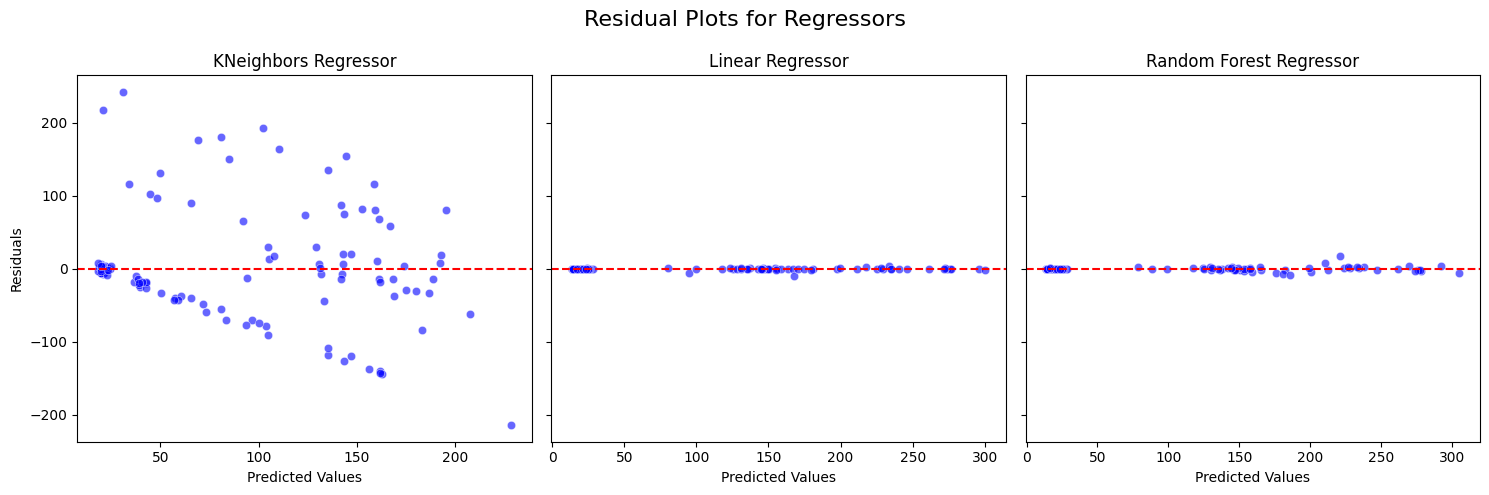

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the plot grid
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 5), sharey=True)
fig.suptitle("Residual Plots for Regressors", fontsize=16)

# Loop through models to create residual plots
for i, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate residuals
    residuals = y_test - y_pred
    
    # Plot residuals
    ax = axes[i]
    sns.scatterplot(x=y_pred, y=residuals, ax=ax, color="blue", alpha=0.6)
    
    # Horizontal line at residual = 0
    ax.axhline(0, color="red", linestyle="--")
    
    # Set plot titles and labels
    ax.set_title(name)
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Residuals" if i == 0 else "")  # Only label y-axis for the first plot

# Adjust layout and title position
plt.tight_layout()
plt.subplots_adjust(top=0.85)


plt.show()


<span style="color: yellow; font-size: 24px;">Evaluation using Error Plot</span>

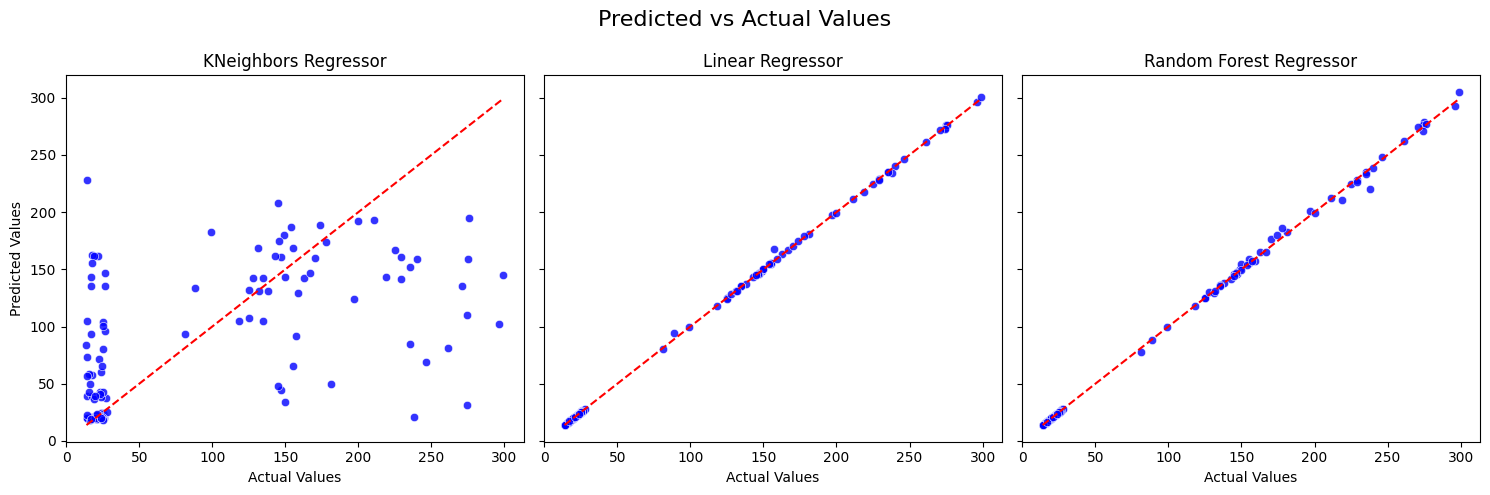

In [226]:

# Initialize the plot grid
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 5), sharey=True)
fig.suptitle("Predicted vs Actual Values", fontsize=16)

# Loop through models to create the predicted vs actual plots
for i, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Plot actual vs predicted values
    ax = axes[i]
    sns.scatterplot(x=y_test, y=y_pred, ax=ax, color="blue", alpha=0.8)
    
    # Add a reference line for perfect predictions
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
    
    # Titles and labels
    ax.set_title(name)
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values" if i == 0 else "")  # Label y-axis only for the first plot

# Adjust layout and title position
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.show()
